# Logistic Regression

This notebook focuses on answering the following questions:

- Why does the L2 norm not work for logisitc regression? Can you show how what it looks like during training?
- What types of loss functions are used for logistic regression?
- How does multiclass logistic regression work?

## Algorithm

The algorithm for logistic regression is very simple, and in fact is very similar to that of linear regression. The model is simply given by:
$$\hat{\underline{y}} = \sigma\left(\underline{\underline{X}}\underline{w}\right)$$

Where $\underline{\underline{X}}$ and $\underline{w}$ are created such that the bias term is captured, and $\sigma$ is the sigmoid function, defined as:
$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Note that the sigmoid function applied to a vector means that it is applied pointwise.

Note that logisitc regression is still a linear model, since the weights are still linear. This means that the optimal weights $\underline{w}^*$ multiply the data linearly. Even though there is a sigmoid function involved, this does not change the interaction between the weights.

This is in contrast to a neural network, for example.

In a simple 2 layer neural network with sigmoid activation functions, you have the following expressions:
$$\underline{\underline{a}}^{(1)} = \underline{\underline{X}}\cdot\underline{\underline{W}}^{(1)}$$
$$\underline{\underline{z}}^{(1)} = \sigma\left(\underline{\underline{a}}^{(1)}\right)$$
$$\underline{{a}}^{(2)} = \underline{\underline{z}}^{(1)}\cdot\underline{W}^{(2)}$$
$$\hat{\underline{y}} = \underline{{z}}^{(2)} = \sigma\left(\underline{{a}}^{(2)}\right)$$

This means that our final predictor is:

$$\hat{\underline{y}} = \sigma\left(
\sigma\left(
\underline{\underline{X}}\cdot\underline{\underline{W}}^{(1)}
\right)\cdot\underline{W}^{(2)}
\right)$$

We can see very clearly that the interaction between the weights is no longer linear. If we now ignore the activation function on the first layer, we arrive at logistic regression again:
$$\hat{\underline{y}} = \sigma\left(
\left(
\underline{\underline{X}}\cdot\underline{\underline{W}}^{(1)}
\right)\cdot\underline{W}^{(2)}
\right) = \sigma\left(\underline{\underline{X}}\cdot \underline{\hat{w}}\right)$$

Where $\underline{\hat{w}} = \underline{\underline{W}}^{(1)}\underline{{W}}^{(2)}$

## Implementation

Current notes and feedback: this is very hardcoded. Can you look at how Logisitc models are implemented in sklearn and learn from that?

In [24]:
import math
import numpy as np

class LogisticRegression:
    def __init__(self, loss):
        self.loss = loss
        
    def model(self, X, w):
        y_hat = np.dot(X, w)
        return sigmoid(y_hat)
        
    def sigmoid(self, arr):
        return 1/(1+e^-arr)
    
    def sigmoid_prime(self, arr):
        return e^-arr / ((1+e^-arr) ** 2)
    
    def grad(w, model):
        pass
    
    def fit(self, X, y):
        # add code to enable multiclass behaviour!
        # add optimization!
        
        
        pass
    
    def predict(self, X):
        pass
    
def gd(gradient, X, y, start = None, learning_rate = 0.01, n_iter = 100, tolerance = 1e-06):
    m, n = X.shape
    if not start:
        start = np.random.rand(n)
    
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector
    
    
# not sure if this is a smart way of intialising loss function? Can you find a better implementation?
# in this case __init__ is just useless no?
class l2_loss:
    def __init__(self):
        pass
    
    def __call__(self, pred, act):
        loss = 0
        for pred_, act_ in zip(pred, act):
            loss += (pred_ - act_)**2
        return loss / len(pred)
    
    def grad(w):
        
        pass
    
def l2_loss(pred, act):
    loss = 0
    for pred_, act_ in zip(pred, act):
        loss += (pred_ - act_)**2
    return loss / len(pred)

def logistic_loss(pred, act):
    # requires actual data to be either 0 or 1!
    # this is also known as binary cross entropy
    loss = 0
    for pred_, act_ in zip(pred, act):
        loss += act*math.log(pred) + (1-act)*log(1-pred)
    return loss / - len(pred)


# ensure gd is compatible with other models and thus not just part of this class!
def gd(self, X, y, model, grad, alpha=0.01, max_iter = 100, precision = 0.0001):
    m, n = X.shape
    w_prev = np.random.rand(n) # this creates a uniform distribution for the weights, add options for choosing the intialisation
    iteration = 0
    step_size = 1
    while step_size > precision and iteration < max_iter:
        # need to add conditions to this to ensure that the optimization stops
        # why not base the optimisation on early stopping?
        w_star = w_prev - alpha * grad(w_prev, X)
        y_hat = model(X, w_star)
        loss = loss_function(y_hat, y)



        # update previous values
        step_size = abs(w_star - w_prev)
        w_prev = w_star
        iteration += 1

        # need to add things to prevent it from overshooting
        # compare loss to before

    return w_star

IndentationError: expected an indented block (<ipython-input-24-e692b1f1428c>, line 16)

## Example

In [20]:
X = np.array([
    [1,2],
    [3,4]
])
gd(X, 1, 1)

array([-0.70161476, -0.09029392,  0.83863441, ..., -0.79483899,
        0.88554094, -0.35539795])

(array([1023., 1027.,  987.,  967.,  970.,  991., 1058., 1004.,  968.,
        1005.]),
 array([-9.99975722e-01, -8.00008954e-01, -6.00042186e-01, -4.00075419e-01,
        -2.00108651e-01, -1.41883334e-04,  1.99824884e-01,  3.99791652e-01,
         5.99758420e-01,  7.99725187e-01,  9.99691955e-01]),
 <BarContainer object of 10 artists>)

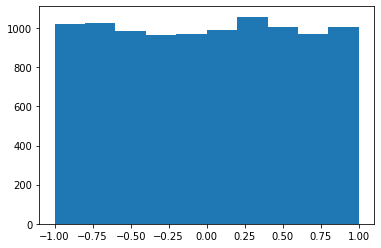

## Why does the L2 norm not work?

## Implementations with different loss functions

## Multiclass logistic regression